In [9]:
words = open('names.txt','r').read().splitlines()

In [10]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

# Starting with Bigram Language Model

In a bigram lm, we are only looking at two charactes at a time. One character given and predict the next char in the sequence. Only looking at the previous language model to predict the next character

In [13]:
# for w in words:
#     for idx in range(len(w) - 1):
#         print(f"current char: {w[idx]}, next char: {w[idx+1]}")

#     print("NEXT WORD")

for w in words[:1]:
    characters = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(characters, characters[1:]):
        print(ch1,ch2)

<S> e
e m
m m
m a
a <E>


Bigram of start character and e 

Bigram of e and m ...

Bigram of a and end character

Bigram LM learns about which chars follow other chars by count statistics, how often does one character appear before another character in the dataaset by counting. How often do these bigrams (touple of char1 and char2) appear in the dataset. 

In [18]:
# creating bigram dictionary
bigram_dict = {}
for w in words:
    characters = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(characters, characters[1:]):
        current_bigram = (ch1,ch2) # char tuple 
        bigram_dict[current_bigram] = bigram_dict.get(current_bigram,0) + 1

In [19]:
bigram_dict

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


We will store this information in a 2-D array instead of a dictionary, where rows represent char1 and columns represent char2, arr[row,col] will represent how often char2 (col) follows char1 (row)

In [20]:
import torch

In [33]:
N = torch.zeros((28,28), dtype=torch.int32)

In [39]:
vocab = sorted(list(set("".join(words))))
ch_to_idx = {ch:idx for idx,ch in enumerate(vocab)}
ch_to_idx['<S>'] = 26
ch_to_idx['<E>'] = 27

In [40]:
ch_to_idx

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [41]:
for w in words:
    characters = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(characters, characters[1:]):
        
        idx1 = ch_to_idx[ch1]
        idx2 = ch_to_idx[ch2]

        N[idx1,idx2] += 1 

visualization of the frquency matrix:

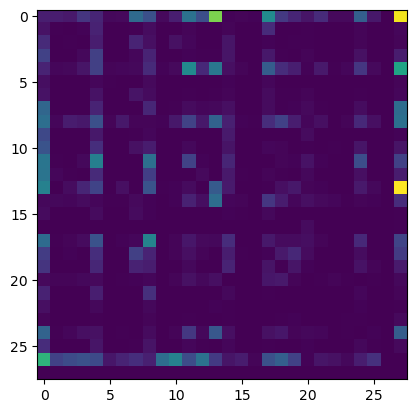

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

(-0.5, 27.5, 27.5, -0.5)

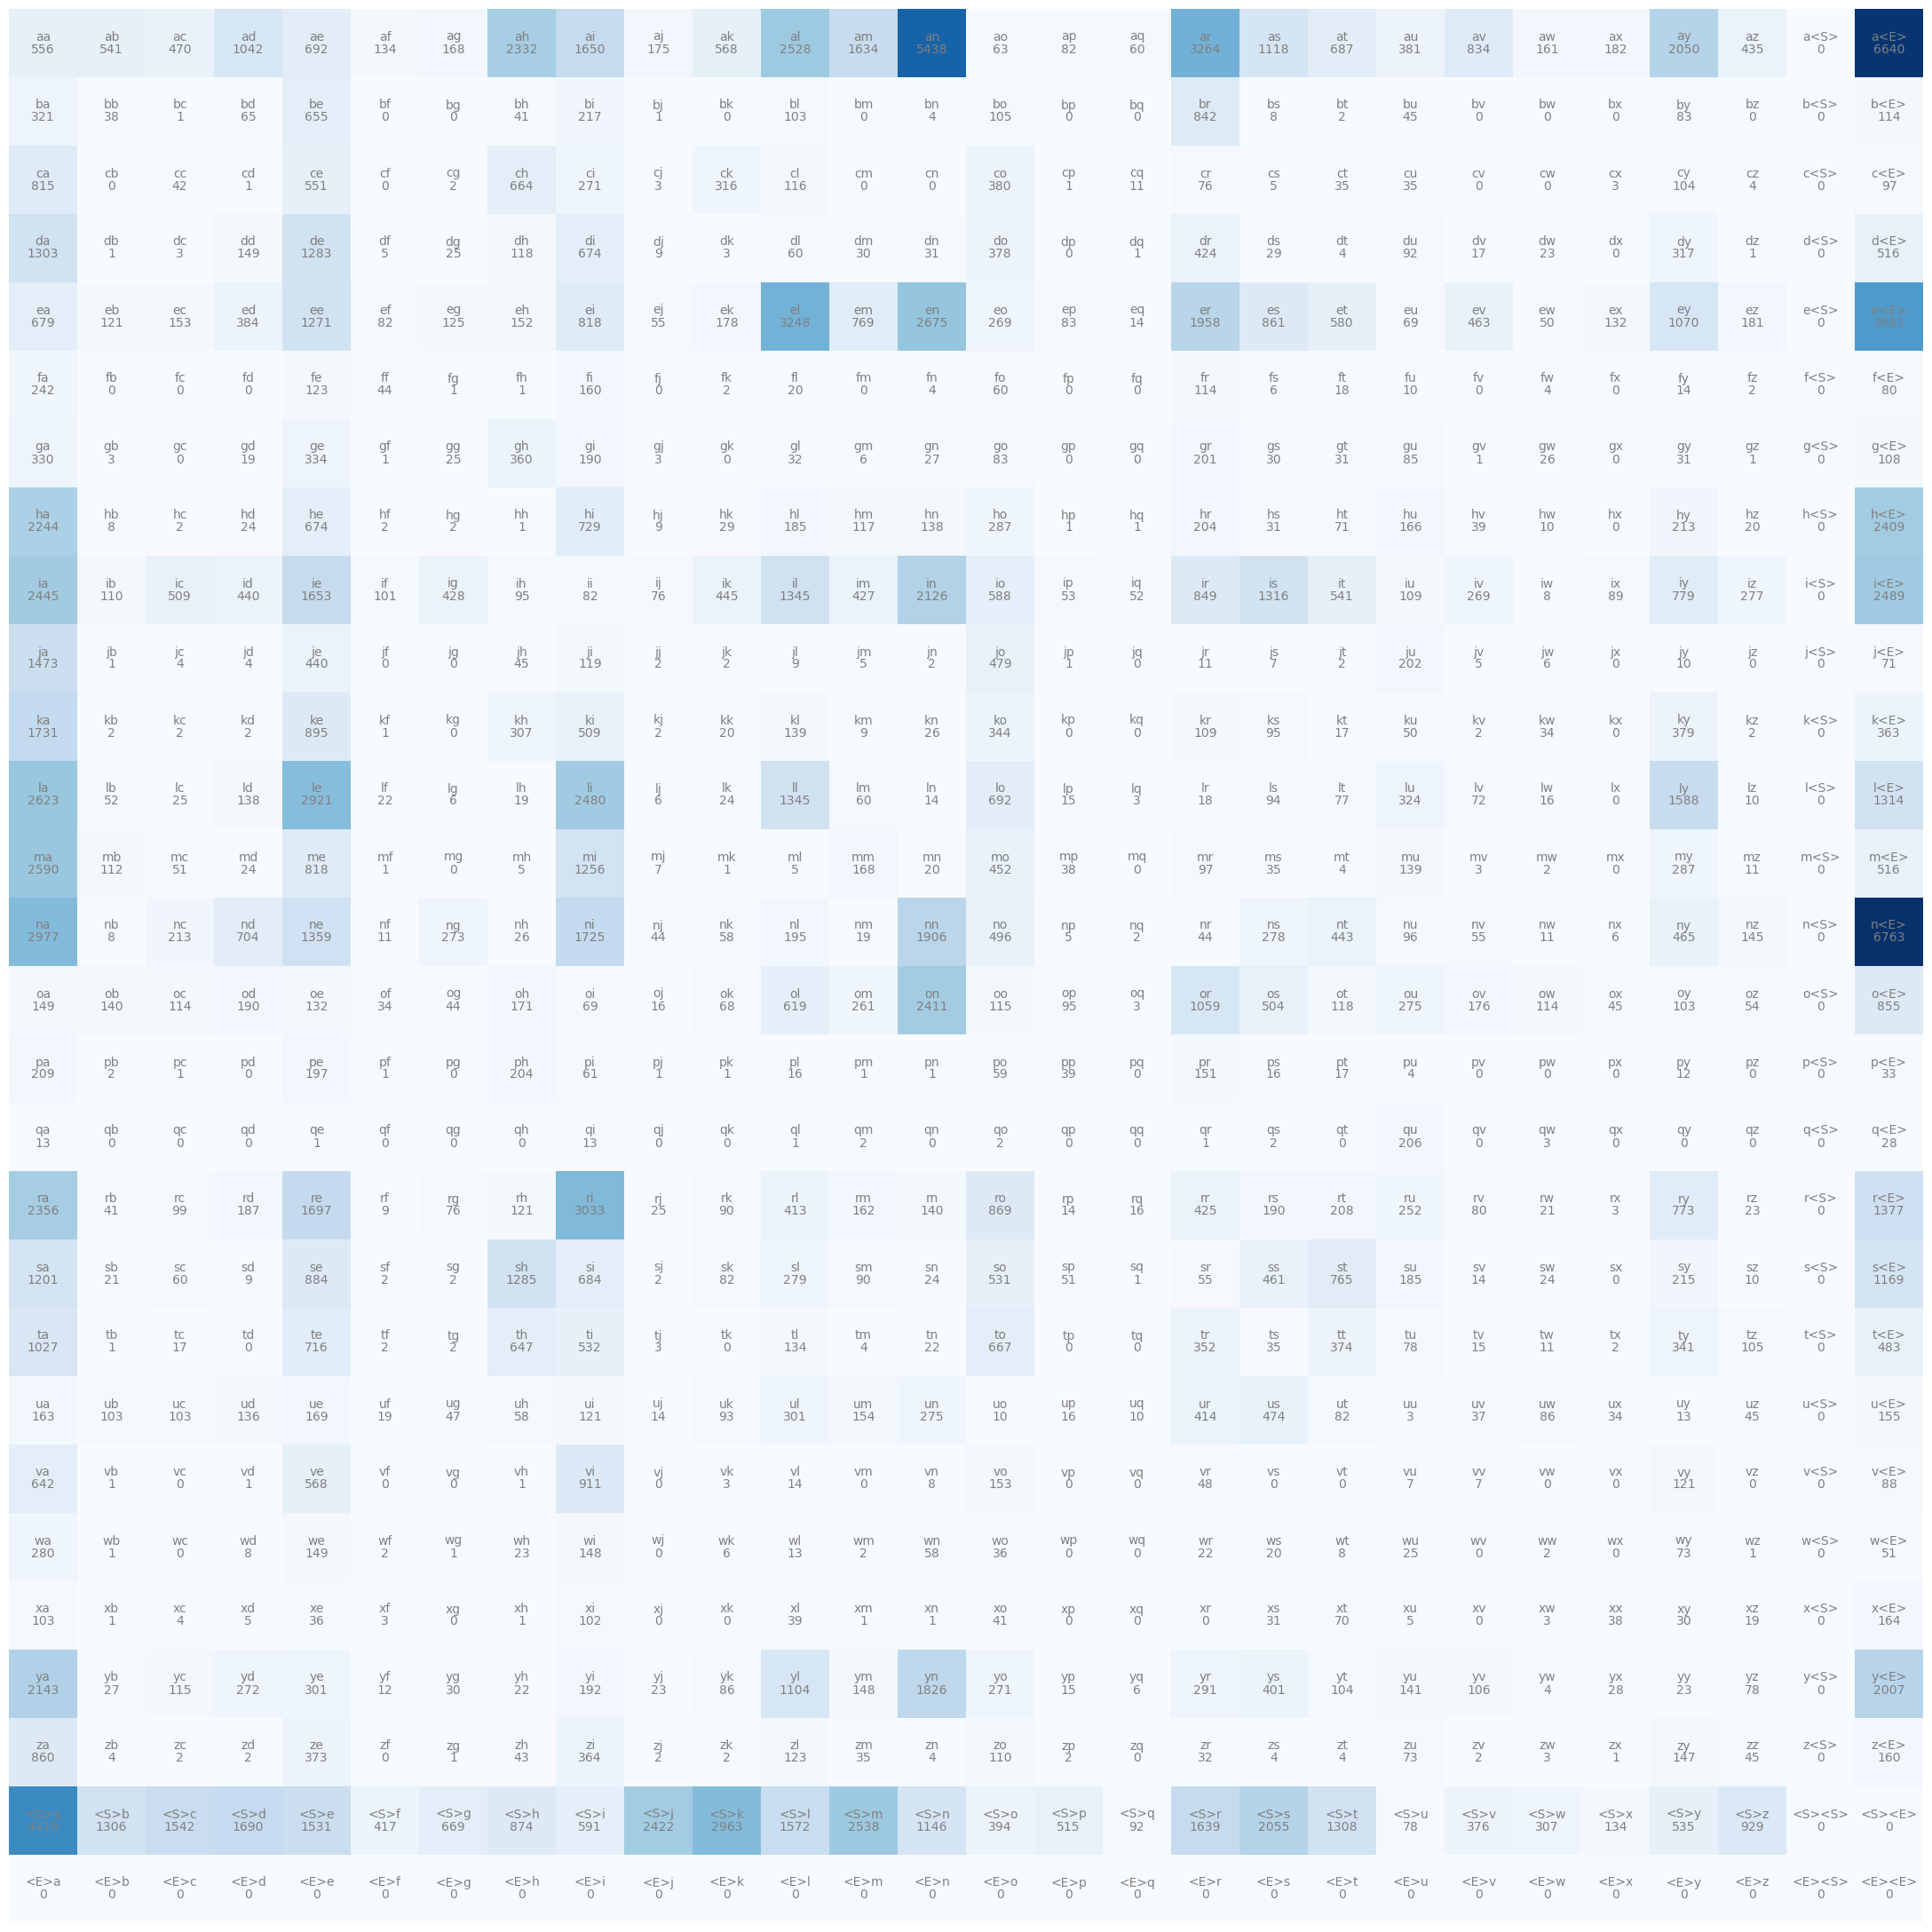

In [53]:
idx_to_ch = {idx:ch for ch,idx in ch_to_idx.items()}

plt.figure(figsize=(28,28))
plt.imshow(N,cmap='Blues')
for i in range(28):
    for j in range(28):
        mapStr = idx_to_ch[i] + idx_to_ch[j]
        plt.text(j,i,mapStr,ha='center',va='bottom',color='grey') #display bigram
        plt.text(j,i,N[i,j].item(),ha='center',va='top',color='grey') #display frequecy of bigram
plt.axis("off")

< E > will never come before < S > or any other character, to fix this and save space, we use '.' as the special character denotion from here onwards

In [61]:
vocab = sorted(list(set("".join(words))))
N = torch.zeros((27,27), dtype=torch.int32)
ch_to_idx = {ch:idx + 1 for idx,ch in enumerate(vocab)}
ch_to_idx['.'] = 0
idx_to_ch = {idx:ch for ch,idx in ch_to_idx.items()}

for w in words:
    characters = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(characters, characters[1:]):
        
        idx1 = ch_to_idx[ch1]
        idx2 = ch_to_idx[ch2]

        N[idx1,idx2] += 1 

visualizing:

(-0.5, 26.5, 26.5, -0.5)

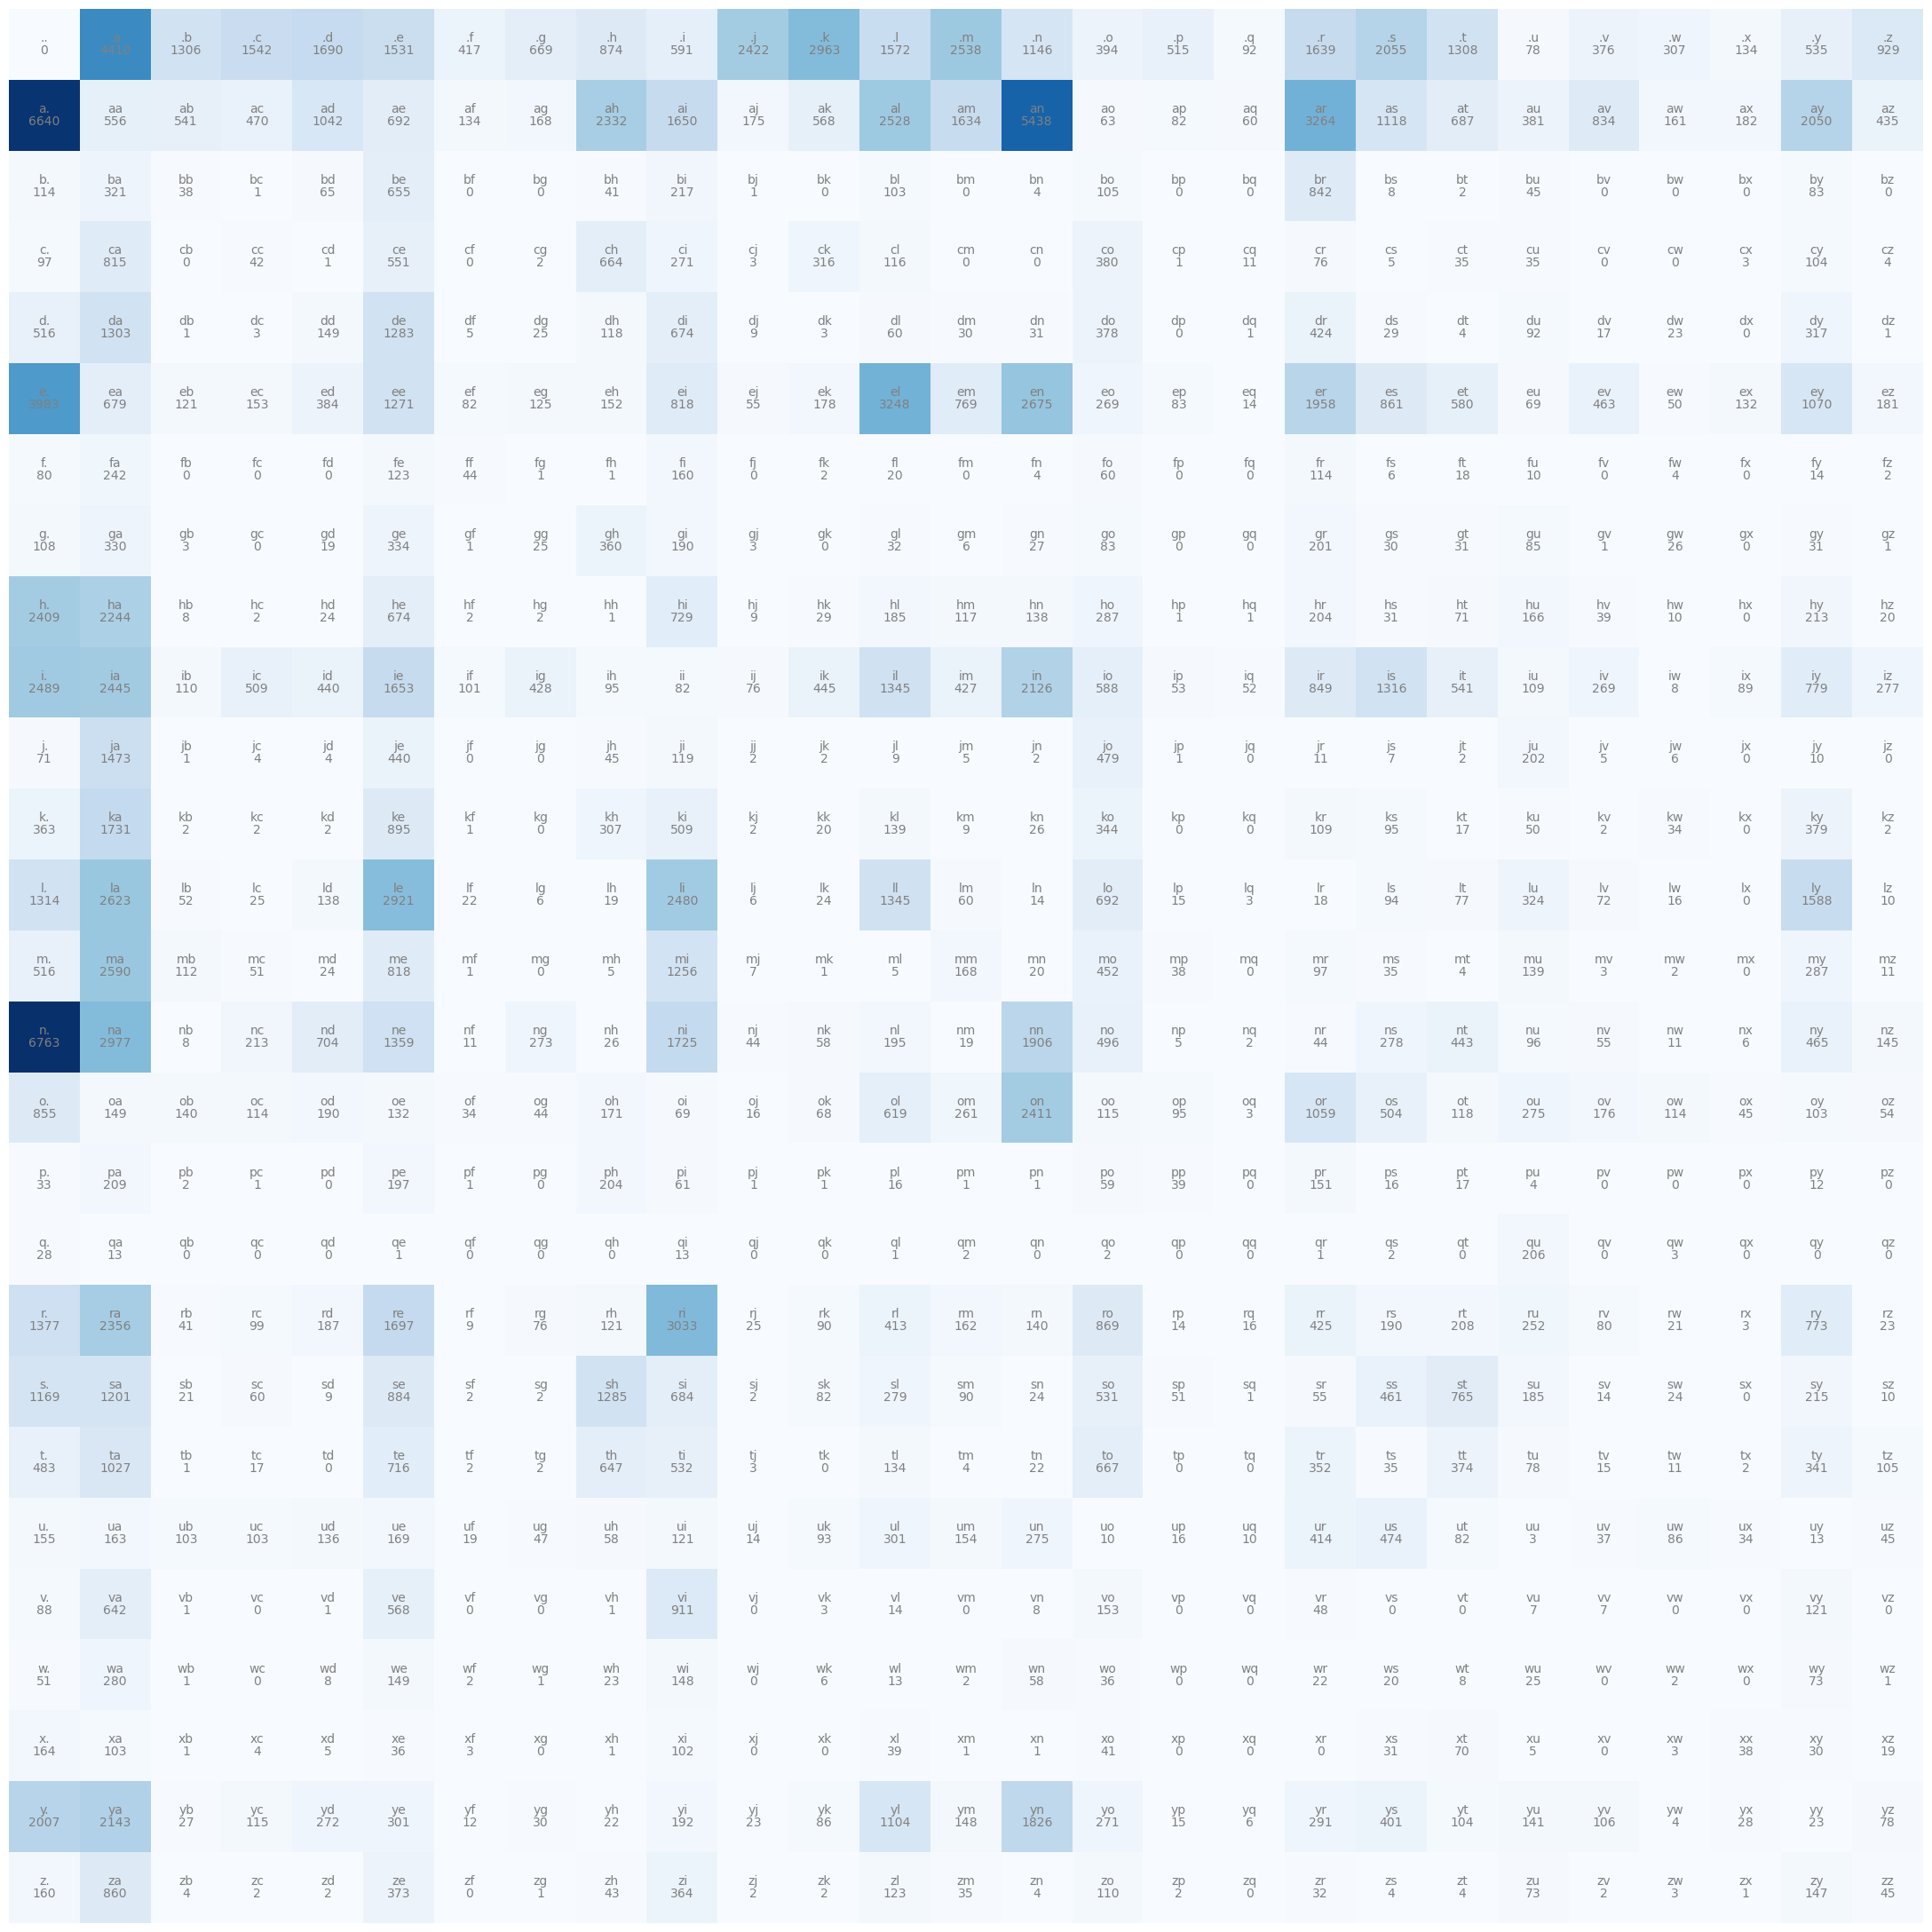

In [62]:
plt.figure(figsize=(28,28))
plt.imshow(N,cmap='Blues')
for i in range(27):
    for j in range(27):
        mapStr = idx_to_ch[i] + idx_to_ch[j]
        plt.text(j,i,mapStr,ha='center',va='bottom',color='grey') #display bigram
        plt.text(j,i,N[i,j].item(),ha='center',va='top',color='grey') #display frequecy of bigram
plt.axis("off")

Given the matrix, we will use this information for the model using probabilities of occurance of all pairs

In [86]:
N[0,:] # 0 th character followed by all the other character frequencies, 0th row all columns

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [93]:
probabs = N[0,:].float()
probabs = probabs / probabs.sum()
probabs

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

We want to sample from this distribution:

Torch.multinomial takes the probability distribution and creates samples of count representing that probability distribution, for example a probability of 80 and 20% with num samples 10 will create 8 samples of 0 and 2 samples of 1 representing the two. 

In [98]:
g = torch.Generator().manual_seed(2147483647)
idx = torch.multinomial(probabs, num_samples=1, replacement=True, generator = g).item()
idx

3

In [99]:
idx_to_ch[idx]

'c'

In [131]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    out = []
    idx = 0
    while True:
        # On the basis of bigram probabilities
        probab = N[idx].float()
        probab = probab / probab.sum()

        # Untrained
        # probab = torch.ones(27) / 27.0
        idx = torch.multinomial(probab, num_samples=1, replacement=True, generator=g).item()
        out.append(idx_to_ch[idx])
        if idx == 0:
            break
    print((''.join(out)))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.


Creating a matrix of row wise probabilites, representing how likely each char is to appear before another char

In [151]:
# P = [row/row.sum() for row in N]
P = N.float() 

In [152]:
P.shape

torch.Size([27, 27])

On the basis of the broadcasting rules, 

Starting from the trailing dimension of both tensors, 

1. dimensions must be equal
or
2. one of them should be one
or
3. one of them does not exist

in this case, P.sum(1,keepdim=True) gives a 27,1 matrix
whereas P is a 27,27 matrix
the division of P / P.sum will be 27,27 / 27,1
so this is permitable, essentially the P.sum will copy all the values in the 27 columns and match P's dimension

In [153]:
P = P / P.sum(1,keepdim=True)
P

tensor([[0.0000e+00, 1.3767e-01, 4.0770e-02, 4.8138e-02, 5.2758e-02, 4.7794e-02,
         1.3018e-02, 2.0885e-02, 2.7284e-02, 1.8450e-02, 7.5610e-02, 9.2498e-02,
         4.9074e-02, 7.9231e-02, 3.5776e-02, 1.2300e-02, 1.6077e-02, 2.8720e-03,
         5.1166e-02, 6.4153e-02, 4.0833e-02, 2.4350e-03, 1.1738e-02, 9.5839e-03,
         4.1832e-03, 1.6702e-02, 2.9001e-02],
        [1.9596e-01, 1.6408e-02, 1.5966e-02, 1.3870e-02, 3.0751e-02, 2.0422e-02,
         3.9546e-03, 4.9579e-03, 6.8821e-02, 4.8694e-02, 5.1645e-03, 1.6763e-02,
         7.4605e-02, 4.8222e-02, 1.6048e-01, 1.8592e-03, 2.4199e-03, 1.7707e-03,
         9.6326e-02, 3.2994e-02, 2.0274e-02, 1.1244e-02, 2.4613e-02, 4.7514e-03,
         5.3711e-03, 6.0499e-02, 1.2838e-02],
        [4.3100e-02, 1.2136e-01, 1.4367e-02, 3.7807e-04, 2.4575e-02, 2.4764e-01,
         0.0000e+00, 0.0000e+00, 1.5501e-02, 8.2042e-02, 3.7807e-04, 0.0000e+00,
         3.8941e-02, 0.0000e+00, 1.5123e-03, 3.9698e-02, 0.0000e+00, 0.0000e+00,
         3.1834e-

In [154]:
P.shape

torch.Size([27, 27])

In [156]:
# this indicates that each row now contains the probability of row char appearing before each col char
P[0].sum()

tensor(1.)

In [157]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    out = []
    idx = 0
    while True:
        # On the basis of bigram probabilities
        # probab = N[idx].float()
        # probab = probab / probab.sum()
        probab = P[idx]

        # Untrained
        # probab = torch.ones(27) / 27.0
        idx = torch.multinomial(probab, num_samples=1, replacement=True, generator=g).item()
        out.append(idx_to_ch[idx])
        if idx == 0:
            break
    print((''.join(out)))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.


At this stage, a bigram language model has been trained on the frequency of occurance of bigram pairs, after calculating the frequency we normalize to get probability distribution. The probability distribution is then used to sample from the model iteratively and feed it in again to get the next character until end special character occurs. 
The elements of the tensor P are essentially the parameters of our bigram language model summarizing the statistics of the bigrams.

### Evaluating the quality of the model

In [167]:
for w in words[:3]:
    chrw = '.' + w + '.'
    for ch1, ch2 in zip(chrw, chrw[1:]):
        i1 = ch_to_idx[ch1]
        i2 = ch_to_idx[ch2]
        probab = P[i1,i2]
        print(f"{ch1}{ch2}: {probab:.4f}")


.e: 0.0478
em: 0.0377
mm: 0.0253
ma: 0.3899
a.: 0.1960
.o: 0.0123
ol: 0.0780
li: 0.1777
iv: 0.0152
vi: 0.3541
ia: 0.1381
a.: 0.1960
.a: 0.1377
av: 0.0246
va: 0.2495
a.: 0.1960


summarizing these probabilities into a single number to measure the quality of the model

A Likelihood function helps quantify how well a model explains the observed data for different parameter values. Finding parameter values that maximize the likelihood gives maximum likelihood estimates. 

Likelihood function for observed data x and parameter theta, is the Joint Probability of x given parameters theta. 

Likelihood of a dataset is the product of the individual probailities of each instance. That is a measure of the quality of the model.

Instead of taking the product of the probabilites, taking the log converts multiplication into addition of probabilites. 'Log likelihood'

1. **Bigrams and Probabilities**:
   - Assume you have a set of character pairs (bigrams), such as "he", "el", "ll", "lo", and so on.
   - For each bigram  (c_1, c_2), 
   you have computed the probability of occurrence  P(c_1, c_2) in your dataset.
   
   For example:
   1. P(he) = 0.1,  
   2. P(el) = 0.05, 
   3. P(ll) = 0.2,  
   4. P(lo) = 0.1

2. **Likelihood of a Sequence of Words**:
   - Suppose you want to compute the likelihood of observing a particular sequence of words, say, "hello".
   - To compute the likelihood of this word using bigram probabilities, we would:
     1. Break the word "hello" into its character pairs (bigrams):
        "he", "el", "ll", "lo"

     2. Use the pre-calculated probabilities for each of these bigrams:
        1. P(he) = 0.1,  
        2. P(el) = 0.05, 
        3. P(ll) = 0.2,  
        4. P(lo) = 0.1

     3. Multiply the probabilities for each bigram to get the likelihood of observing the entire sequence "hello" under your model.
   
3. **Likelihood of a Dataset of Words**:
   - If you have a dataset of multiple words, say w_1, w_2, ..., w_m, you can calculate the likelihood of the entire dataset by computing the likelihood of each word individually and then multiplying them.

In [175]:
log_likelihood = 0.0
n = 0
for w in words:
    chrw = '.' + w + '.'
    for ch1, ch2 in zip(chrw, chrw[1:]):
        i1 = ch_to_idx[ch1]
        i2 = ch_to_idx[ch2]
        n += 1
        probab = P[i1,i2]
        # Taking the log of individual likelihoods
        logprobab = torch.log(probab)
        log_likelihood += logprobab
        # print(f"{ch1}{ch2}: {probab:.4f} {logprobab:.4f}")

print(f"{log_likelihood}")
neg_log_likelihood = -log_likelihood
print(f"{neg_log_likelihood/n}")

-559891.75
2.454094171524048


We take the negative of log likelihood to invert the representation of low porbability(bad estimation) to be a higher number. 

This way the loss function can minimize the number.

Neg log likelihood goes from 0 to infinity, with 0 being perfect prediction and infinity being the worst prediction.

GOAL: maximize the likelihood
maximize the log likelihood
minimize the neg log likelihood
minimize the loss function

This indicates the quality of the model, lower the better

In [178]:
log_likelihood = 0.0
n = 0
for w in ['jq']:
    chrw = '.' + w + '.'
    for ch1, ch2 in zip(chrw, chrw[1:]):
        i1 = ch_to_idx[ch1]
        i2 = ch_to_idx[ch2]
        n += 1
        probab = P[i1,i2]
        # Taking the log of individual likelihoods
        logprobab = torch.log(probab)
        log_likelihood += logprobab
        print(f"{ch1}{ch2}: {probab:.4f} {logprobab:.4f}")

print(f"{log_likelihood}")
neg_log_likelihood = -log_likelihood
print(f"{neg_log_likelihood/n}")

.j: 0.0756 -2.5822
jq: 0.0000 -inf
q.: 0.1029 -2.2736
-inf
inf


In this odd case, model fails to predict because it has not come across any instances where this combination occurs. 

To prevent this from happening model smoothing is done, by adding some numerical values to the count table before calculating the probability. 

In [179]:
P = (N + 1).float()
P /= P.sum(1, keepdims=True)

In [180]:
log_likelihood = 0.0
n = 0
for w in ['jq']:
    chrw = '.' + w + '.'
    for ch1, ch2 in zip(chrw, chrw[1:]):
        i1 = ch_to_idx[ch1]
        i2 = ch_to_idx[ch2]
        n += 1
        probab = P[i1,i2]
        # Taking the log of individual likelihoods
        logprobab = torch.log(probab)
        log_likelihood += logprobab
        print(f"{ch1}{ch2}: {probab:.4f} {logprobab:.4f}")

print(f"{log_likelihood}")
neg_log_likelihood = -log_likelihood
print(f"{neg_log_likelihood/n}")

.j: 0.0756 -2.5826
jq: 0.0003 -7.9817
q.: 0.0970 -2.3331
-12.897483825683594
4.299161434173584


## Neural Network Introduction

In [193]:
# Creating the training set of bigram(x,y) (ch1,following ch2)

xs, ys = [], [] # input and target(labels)(next character)

for w in words[:1]:
    characters = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(characters, characters[1:]):
        
        idx1 = ch_to_idx[ch1]
        idx2 = ch_to_idx[ch2]
        print(ch1,ch2)
        xs.append(idx1)
        ys.append(idx2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)


. e
e m
m m
m a
a .


In [194]:
xs

tensor([ 0,  5, 13, 13,  1])

for input 0, label(desired output) is 5

for input 5, label(desired output) is 13 ...

In [195]:
ys

tensor([ 5, 13, 13,  1,  0])

**One hot encoding**

In [198]:
import torch.nn.functional as F
xen = F.one_hot(xs, num_classes=27)
xen

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0]])

In [199]:
xen.shape

torch.Size([5, 27])

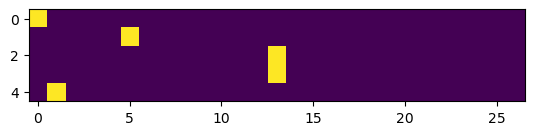

In [200]:
plt.imshow(xen)

In [201]:
xen.dtype

torch.int64

**Note of Caution:**

when plugging numbers inside neural network, you want them to be floating point not integers.

In [202]:
xen = F.one_hot(xs, num_classes=27).float()
xen.dtype

torch.float32

Defining the weights:

In [211]:
W = torch.randn((27,1)) # weights by neurons
W

tensor([[-1.3209],
        [ 0.9253],
        [-0.2155],
        [-0.2423],
        [ 0.3452],
        [-0.8151],
        [-0.3368],
        [-0.2190],
        [-0.8039],
        [ 1.1253],
        [ 0.8404],
        [-1.0694],
        [ 1.1679],
        [ 0.7974],
        [ 0.5577],
        [-0.7272],
        [-0.1386],
        [ 0.4631],
        [-0.3233],
        [-1.0918],
        [-0.6234],
        [ 0.2822],
        [-0.9323],
        [-0.3265],
        [ 0.2225],
        [-0.8994],
        [ 1.5751]])

In [212]:
# 5 inputs . e m m a hot encoded and multiplied by the weights
# 5,27 @ 27,1 = 5,1
xen @ W

tensor([[-1.3209],
        [-0.8151],
        [ 0.7974],
        [ 0.7974],
        [ 0.9253]])

In [213]:
# redifining W for 27 neurons
W = torch.randn((27,27))
xen @ W

tensor([[ 0.0790, -0.8388,  1.0175,  0.2081, -1.8756, -0.6585, -0.8432, -0.4456,
          1.5135, -0.2285, -0.9446,  0.3803,  0.1724,  0.5670,  0.0980, -1.1514,
          0.4193,  1.9181, -0.0226,  1.5828,  1.9823, -3.0522, -0.2173, -1.0421,
         -0.2939,  1.8603, -0.5158],
        [-1.4260, -0.6105,  0.6664,  0.7892,  0.0667, -1.9920, -0.8753,  0.8023,
          0.8550, -1.6550, -0.0412, -2.0721, -1.0307, -1.3751,  0.2919, -0.6528,
          0.5688,  0.2263,  0.6724,  1.4060,  0.3171,  0.0176,  0.3473,  1.6435,
         -2.3804, -1.3482, -1.0703],
        [ 0.1916, -0.5630, -0.9289, -0.4299,  1.2208, -1.0319, -1.1411, -1.2003,
          0.6133, -0.8579,  1.3269, -0.0363, -1.4895, -0.7426, -0.6576, -0.2709,
         -0.6343,  1.1253,  0.9623, -1.4483, -1.5920,  0.4018, -0.6664,  1.2233,
         -1.6077,  0.2237,  0.7452],
        [ 0.1916, -0.5630, -0.9289, -0.4299,  1.2208, -1.0319, -1.1411, -1.2003,
          0.6133, -0.8579,  1.3269, -0.0363, -1.4895, -0.7426, -0.6576, -0.2709

In [215]:
(xen @ W)[3,13] # 13th neruon on 3rd input 

tensor(-0.7426)

So far we have a neural network, with a single layer, of 27 neurons, no activation function and no bias addition.

The negative and positive numbers generated by the neural net so far are of no use, we want them to represent a probability distribution which indicates the next possible character.

These 27 counts are essentially giving us log counts, we are going to that those numbers and exponentiate them.

In [216]:
(xen @ W).exp()

tensor([[1.0823, 0.4323, 2.7663, 1.2313, 0.1533, 0.5176, 0.4303, 0.6404, 4.5428,
         0.7957, 0.3888, 1.4627, 1.1882, 1.7630, 1.1030, 0.3162, 1.5209, 6.8083,
         0.9777, 4.8685, 7.2594, 0.0473, 0.8047, 0.3527, 0.7454, 6.4260, 0.5970],
        [0.2403, 0.5431, 1.9472, 2.2017, 1.0690, 0.1364, 0.4168, 2.2306, 2.3514,
         0.1911, 0.9596, 0.1259, 0.3568, 0.2528, 1.3390, 0.5206, 1.7661, 1.2540,
         1.9590, 4.0798, 1.3732, 1.0178, 1.4153, 5.1732, 0.0925, 0.2597, 0.3429],
        [1.2111, 0.5695, 0.3950, 0.6506, 3.3900, 0.3563, 0.3195, 0.3011, 1.8466,
         0.4240, 3.7693, 0.9644, 0.2255, 0.4759, 0.5181, 0.7627, 0.5303, 3.0812,
         2.6176, 0.2350, 0.2035, 1.4945, 0.5135, 3.3983, 0.2003, 1.2507, 2.1068],
        [1.2111, 0.5695, 0.3950, 0.6506, 3.3900, 0.3563, 0.3195, 0.3011, 1.8466,
         0.4240, 3.7693, 0.9644, 0.2255, 0.4759, 0.5181, 0.7627, 0.5303, 3.0812,
         2.6176, 0.2350, 0.2035, 1.4945, 0.5135, 3.3983, 0.2003, 1.2507, 2.1068],
        [1.0547, 0.1073,

Due to exponentiation, negative numbers are now positive but less than one, and positive numbers are greater positive numbers.

1. W @ x gave us logits (log counts)
2. exponentiated to get similar to counts
3. normalized the counts to get probability distribution

All these operations are differntiable making this back propagation capabale.

In [218]:
logits = (xen @ W) # log-counts
# softmax: converts neural net output into probability distribution
counts = logits.exp() # equivalent to the N matrix earlier
Nprobab = counts / counts.sum(1,keepdims = True) # normalizing the rows to get probabilites

Nprobab

tensor([[0.0220, 0.0088, 0.0562, 0.0250, 0.0031, 0.0105, 0.0087, 0.0130, 0.0923,
         0.0162, 0.0079, 0.0297, 0.0241, 0.0358, 0.0224, 0.0064, 0.0309, 0.1383,
         0.0199, 0.0989, 0.1475, 0.0010, 0.0163, 0.0072, 0.0151, 0.1306, 0.0121],
        [0.0071, 0.0162, 0.0579, 0.0655, 0.0318, 0.0041, 0.0124, 0.0664, 0.0699,
         0.0057, 0.0285, 0.0037, 0.0106, 0.0075, 0.0398, 0.0155, 0.0525, 0.0373,
         0.0583, 0.1214, 0.0408, 0.0303, 0.0421, 0.1539, 0.0028, 0.0077, 0.0102],
        [0.0381, 0.0179, 0.0124, 0.0205, 0.1066, 0.0112, 0.0100, 0.0095, 0.0580,
         0.0133, 0.1185, 0.0303, 0.0071, 0.0150, 0.0163, 0.0240, 0.0167, 0.0969,
         0.0823, 0.0074, 0.0064, 0.0470, 0.0161, 0.1068, 0.0063, 0.0393, 0.0662],
        [0.0381, 0.0179, 0.0124, 0.0205, 0.1066, 0.0112, 0.0100, 0.0095, 0.0580,
         0.0133, 0.1185, 0.0303, 0.0071, 0.0150, 0.0163, 0.0240, 0.0167, 0.0969,
         0.0823, 0.0074, 0.0064, 0.0470, 0.0161, 0.1068, 0.0063, 0.0393, 0.0662],
        [0.0365, 0.0037,

In [219]:
Nprobab[0].sum()

tensor(1.0000)

In [221]:
Nprobab.shape

torch.Size([5, 27])

In [229]:
# probabilites of the correct next character for the inputs as calculated by the neural network
# Nprobab[0,5], Nprobab[1,13], Nprobab[3,13], Nprobab[4,0]

# another way to get this is
Nprobab[torch.arange(5), ys]

tensor([0.0105, 0.0075, 0.0150, 0.0179, 0.0365])

Taking the negative log of those probabilites to calculate loss:

In [230]:
loss = -Nprobab[torch.arange(5),ys].log().mean()
loss

tensor(4.1961)

**Performing Back Propagation:**

In [237]:
# before backpropagation, we need to tell pytorch to have gradients for W since it is leaf tensor
W = torch.randn((27,27), requires_grad=True)

# recalculating the loss
logits = (xen @ W)
counts = logits.exp() 
Nprobab = counts / counts.sum(1,keepdims = True) 
loss = -Nprobab[torch.arange(5),ys].log().mean()

In [238]:
loss

tensor(3.2923, grad_fn=<NegBackward0>)

In [254]:
W.grad = None # set to zero gradient
loss.backward()

Every element of W.grad tells the effect of that element on the loss

For eg: A positive number for example indicates that adding a small value 'h' to the element would increase the loss mildly becaues the gradient is positive.

In [248]:
W.grad

tensor([[ 0.0108,  0.0020,  0.0089,  0.0070,  0.0070, -0.1409,  0.0044,  0.0019,
          0.0079,  0.0015,  0.0071,  0.0050,  0.0017,  0.0014,  0.0066,  0.0068,
          0.0022,  0.0028,  0.0150,  0.0016,  0.0010,  0.0013,  0.0082,  0.0032,
          0.0046,  0.0075,  0.0133],
        [-0.1941,  0.0024,  0.0024,  0.0060,  0.0143,  0.0059,  0.0065,  0.0015,
          0.0056,  0.0111,  0.0069,  0.0094,  0.0062,  0.0105,  0.0047,  0.0043,
          0.0021,  0.0052,  0.0017,  0.0034,  0.0007,  0.0057,  0.0037,  0.0137,
          0.0227,  0.0206,  0.0170],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [255]:
# updating W to reduce the loss
W.data += -0.1 * W.grad

In [256]:
# forward pass and recalculating loss:

logits = (xen @ W)
counts = logits.exp() 
Nprobab = counts / counts.sum(1,keepdims = True) 
loss = -Nprobab[torch.arange(5),ys].log().mean()

print(loss.item())

3.1968483924865723


Repeating the above steps in a loop format achieves gradient descent. Consolidating the following steps below:

In [257]:
W = torch.randn((27,27),requires_grad=True)
for i in range(10):

    # forward pass
    logits = xen @ W
    count = logits.exp()
    Nprobab = count / count.sum(1, keepdim = True)
    loss = -Nprobab[torch.arange(5),ys].log().mean()
    print(loss.item())

    # backward pass
    W.grad = None
    loss.backward()

    # updating W
    W.data += -0.1 * W.grad

4.219539165496826
4.1983537673950195
4.1771931648254395
4.1560564041137695
4.134943962097168
4.113857269287109
4.092795372009277
4.0717597007751465
4.050749778747559
4.029766082763672


In [265]:
# redefine xencoded (xen) for all the data: 

# Creating the training set of bigram(x,y) (ch1,following ch2)

xs, ys = [], [] # input and target(labels)(next character)
inputs = 0

for w in words:
    characters = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(characters, characters[1:]):
        
        idx1 = ch_to_idx[ch1]
        idx2 = ch_to_idx[ch2]
        inputs += 1
        # print(ch1,ch2)
        xs.append(idx1)
        ys.append(idx2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

xen = F.one_hot(xs, num_classes=27).float()

In [266]:
W = torch.randn((27,27),requires_grad=True)

In [267]:
for i in range(100):

    # forward pass
    logits = xen @ W
    count = logits.exp()
    Nprobab = count / count.sum(1, keepdim = True)
    loss = -Nprobab[torch.arange(inputs),ys].log().mean()
    print(loss.item())

    # backward pass
    W.grad = None
    loss.backward()

    # updating W
    W.data += -10 * W.grad

3.8010764122009277
3.713573455810547
3.6354706287384033
3.5650758743286133
3.501256227493286
3.443206548690796
3.3903117179870605
3.3420536518096924
3.297960042953491
3.257587194442749
3.220517158508301
3.1863675117492676
3.154799699783325
3.1255204677581787
3.0982799530029297
3.0728695392608643
3.0491116046905518
3.026857852935791
3.0059807300567627
2.9863693714141846
2.967928409576416
2.950570583343506
2.9342195987701416
2.9188029766082764
2.90425705909729
2.890519618988037
2.8775346279144287
2.8652491569519043
2.8536133766174316
2.8425815105438232
2.83211088180542
2.8221609592437744
2.812695026397705
2.8036797046661377
2.7950830459594727
2.7868759632110596
2.7790327072143555
2.771528482437134
2.764341354370117
2.757451057434082
2.7508385181427
2.7444872856140137
2.7383813858032227
2.732506036758423
2.7268481254577637
2.72139573097229
2.7161378860473633
2.7110633850097656
2.706162452697754
2.7014265060424805
2.696847677230835
2.692417860031128
2.688129425048828
2.683976411819458
2.67

In [270]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0

    while True:

        xen = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xen @ W
        count = logits.exp()
        p = count / count.sum(1, keepdim = True)
        
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(idx_to_ch[ix])
        if ix == 0:
            break
    print(''.join(out))
        

cexzdalemasuraile.
kayha.
kllimittain.
llayn.
ka.
